Dans ce projet, nous allons analyser l'evolution du Covid-19 dans le monde.
Voici quelques questions qui peuvent guider notre analyse.
Source de données:
 https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide



*   Quels sont les pays avec les plus grand nombres de cas?
*   Quels sont les pays avec un taux de mortalité élévé?
*   Le confinement a-t-il eu un effet sur le nombre de cas?
*  Comparer la situation par continent






J'ai refait ce projet en regardant la vidéo Youtube de Kevin Degila:
https://www.youtube.com/watch?v=ABFn3ip210M&list=PL049bGjkT7dLJo748aOvXnUg0YtR1tacv&index=31

#Importer les données

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
!pip install xlrd==1.2.0

In [17]:
df = pd.read_excel('/content/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xls')

In [19]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [23]:
df.shape

(61900, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     61900 non-null  datetime64[ns]
 1   day                                                         61900 non-null  int64         
 2   month                                                       61900 non-null  int64         
 3   year                                                        61900 non-null  int64         
 4   cases                                                       61900 non-null  int64         
 5   deaths                                                      61900 non-null  int64         
 6   countriesAndTerritories                                     61900 non-null  object        
 7   geoId                 

In [24]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [21]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [26]:
#df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [28]:
df.isnull().sum().sum()

3400

In [29]:
df.isnull().mean()

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.004443
countryterritoryCode                                          0.001987
popData2019                                                   0.001987
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0.046511
dtype: float64

In [30]:
df.dropna(inplace=True)

# Pays avec les plus grand nombre de cas

In [ ]:
df.head()

In [33]:
df_by_countries = df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases', ascending=False)
df_by_countries

<ipython-input-33-3b3f7d600a0f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_countries = df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases', ascending=False)


,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
...,...,...
Montserrat,8,1
Falkland_Islands_(Malvinas),8,0
Anguilla,7,0


#Pays avec le taux de mortalité le plus élevé

In [34]:
df_by_countries['mortality_rate'] = df_by_countries['deaths'] / df_by_countries['cases']

In [35]:
df_by_countries['mortality_rate'].head()

countriesAndTerritories
United_States_of_America    0.018403
India                       0.014504
Brazil                      0.026283
Russia                      0.017687
France                      0.024365
Name: mortality_rate, dtype: float64

ValueError: ignored

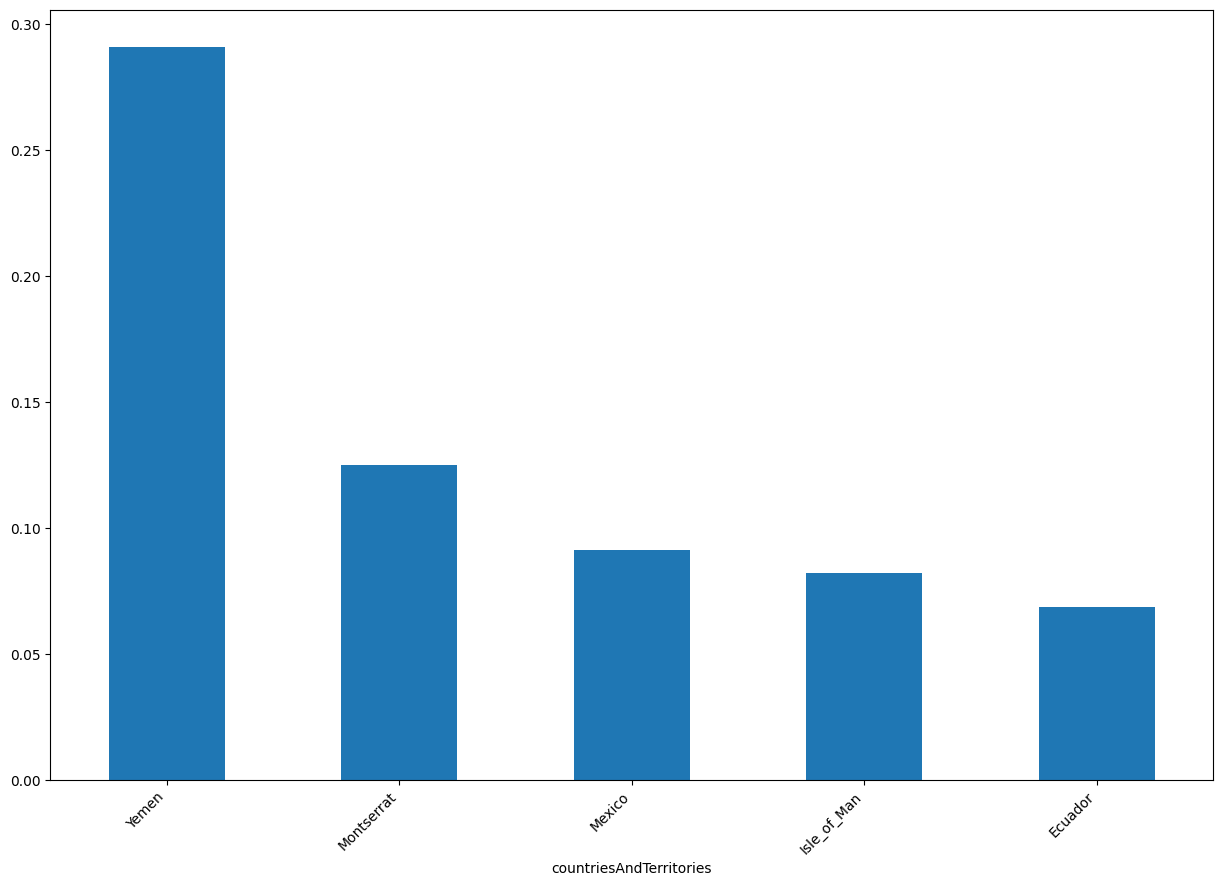

In [38]:
# Sorting values for the mortality rate in descending order
plt.figure(figsize=(15, 10))
ax = df_by_countries['mortality_rate'].sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xticklabels("Country")
ax.set_yticklabels("Mortality rate")
ax.set_title("Countries with highest mortality rates")

# Pays avec le plus de morts

<ipython-input-39-b92eaa4ae4fc>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-39-b92eaa4ae4fc>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels("Countries suffering the most fatalities from COVID-19")


ValueError: ignored

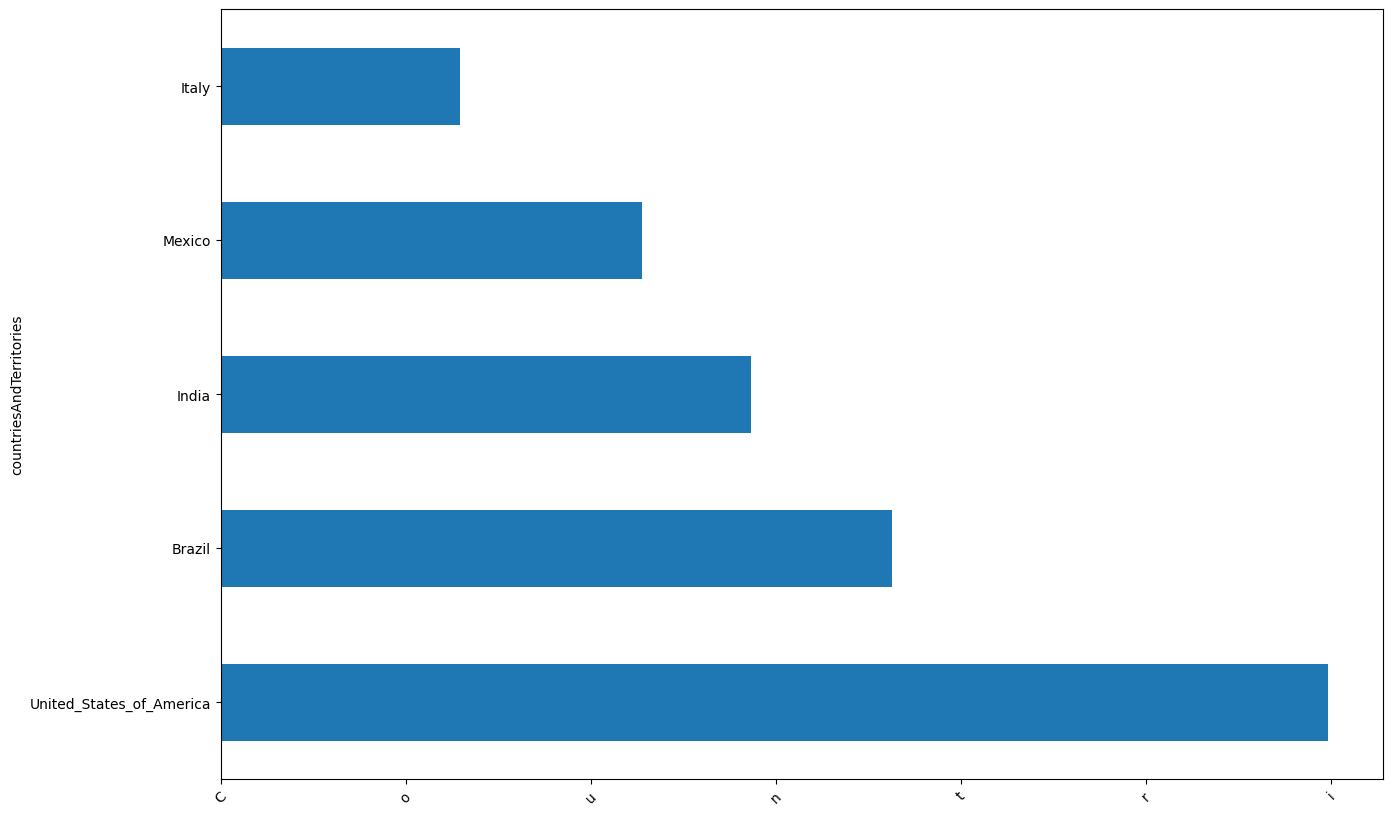

In [39]:
# Sorting values for the mortality rate in descending order
plt.figure(figsize=(15, 10))
ax = df_by_countries['deaths'].sort_values(ascending=False).head(5).plot(kind='barh')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xticklabels("Countries suffering the most fatalities from COVID-19")
ax.set_yticklabels("Countries")
ax.set_title("Number of deaths")

#Effet du confinement sur le nombre de cas

In [40]:
df_by_month = df.groupby('month')['cases', 'deaths'].sum()

<ipython-input-40-9000c2b7f93e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month = df.groupby('month')['cases', 'deaths'].sum()


In [41]:
df_by_month.head()

,cases,deaths
month,,
1,9767,212
2,74717,2702
3,714475,35668
4,2338739,189142
5,2891247,140118


AttributeError: ignored

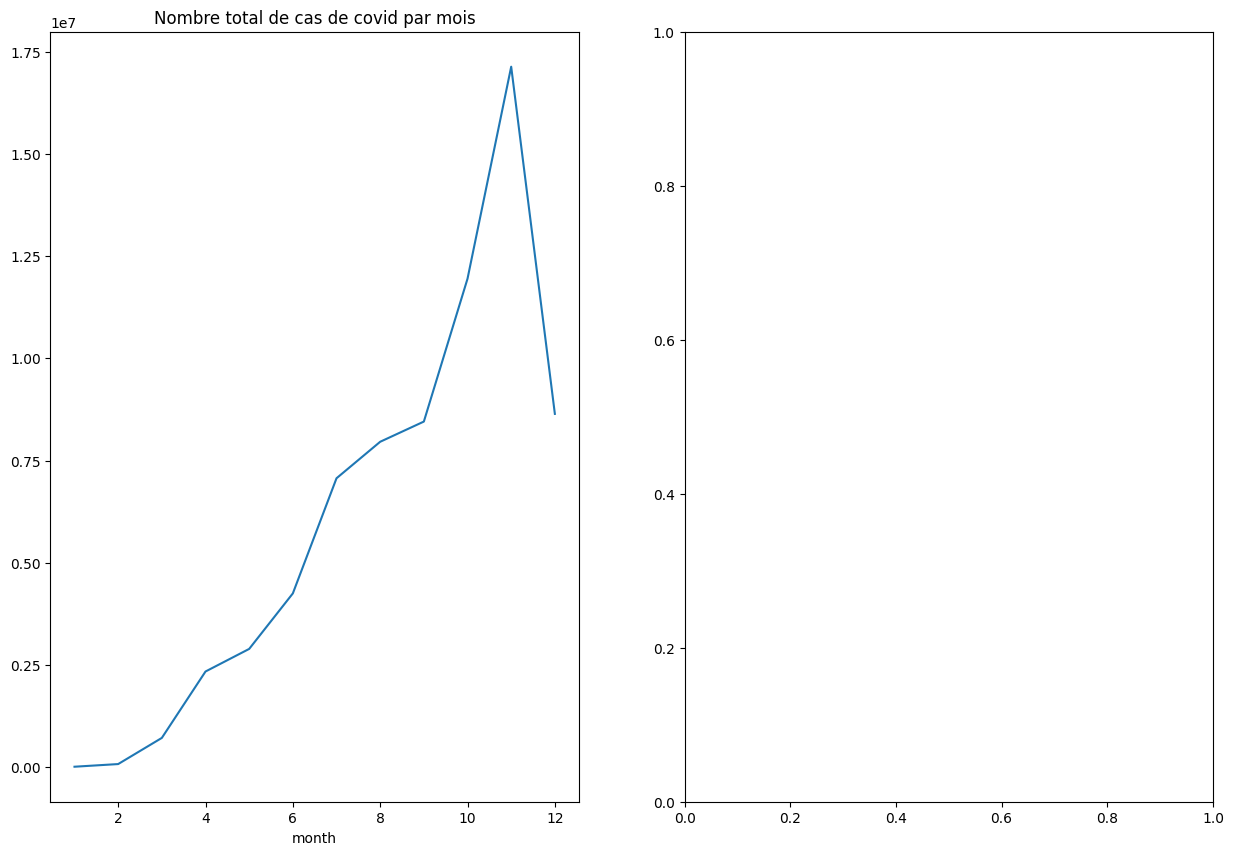

In [42]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line', ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabels("Mois")
ax1.set_ylabels("Nmobre de cas")
df_by_month['deaths'].plot(kind='line', ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax1.set_xlabels("Mois")
ax1.set_ylabels("Nmobre de morts")

Quand on regarde de façon globale, on n'a pas l'impression d'une diminution. Essayons de voir le cas de certains pays en particulier, qui ont un confinement strict(Allemagne, Angleterre, France et Italie).

In [48]:
df_germany = df[df.countriesAndTerritories == 'Germany']
df_germany_monthwise = df_germany.groupby('month')['cases', 'deaths'].sum()
df_germany_grouped = df_germany_monthwise.reset_index()

df_uk = df[df.countriesAndTerritories == 'United_Kingdom']
df_uk_monthwise = df_uk.groupby('month')['cases', 'deaths'].sum()

df_uk_grouped = df_uk_monthwise.reset_index()

df_france = df[df.countriesAndTerritories == 'France']
df_france_monthwise = df_france.groupby('month')['cases', 'deaths'].sum()
df_france_grouped = df_france_monthwise.reset_index()

df_italy = df[df.countriesAndTerritories == 'Germany']
df_italy_monthwise = df_italy.groupby('month')['cases', 'deaths'].sum()
df_italy_grouped = df_italy_monthwise.reset_index()

<ipython-input-48-e75cf6ce13c9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_germany_monthwise = df_germany.groupby('month')['cases', 'deaths'].sum()
<ipython-input-48-e75cf6ce13c9>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_uk_monthwise = df_uk.groupby('month')['cases', 'deaths'].sum()
<ipython-input-48-e75cf6ce13c9>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_france_monthwise = df_france.groupby('month')['cases', 'deaths'].sum()
<ipython-input-48-e75cf6ce13c9>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_italy_monthwise = df_italy.groupby('month')['cases', 'deaths'].sum()


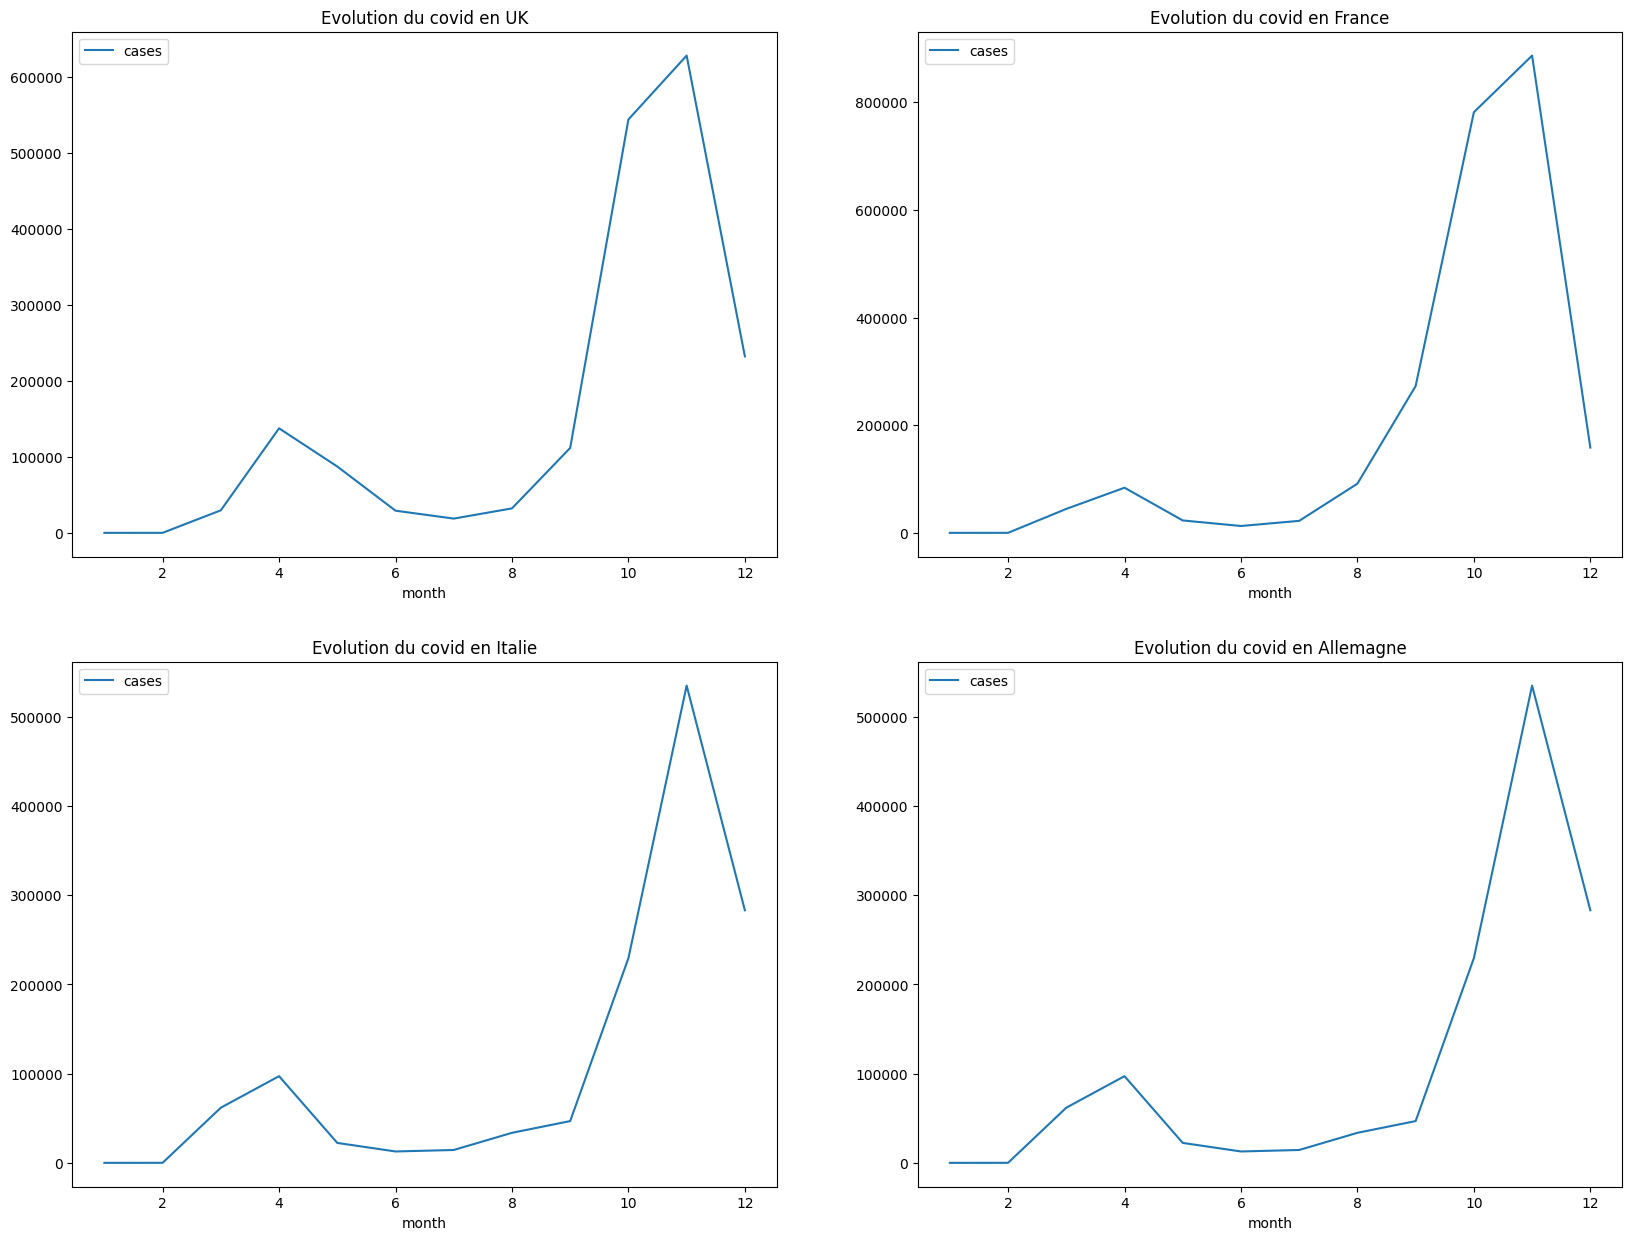

In [52]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2,2,1)
df_uk_grouped.plot(kind='line',x='month', y='cases', ax=ax1)
ax1.set_title("Evolution du covid en UK")

ax2 = fig.add_subplot(2,2,2)
df_france_grouped.plot(kind='line',x='month', y='cases', ax=ax2)
ax2.set_title("Evolution du covid en France")

ax3 = fig.add_subplot(2,2,3)
df_italy_grouped.plot(kind='line',x='month', y='cases', ax=ax3)
ax3.set_title("Evolution du covid en Italie")

ax4 = fig.add_subplot(2,2,4)
df_germany_grouped.plot(kind='line',x='month', y='cases', ax=ax4)
ax4.set_title("Evolution du covid en Allemagne")
plt.show()

#Situation par continent

In [53]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [55]:
df['continentExp'].value_counts()

Europe     16657
Africa     14004
America    13105
Asia       12695
Oceania     2298
Name: continentExp, dtype: int64

In [63]:
df_c = df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('cases')
df_c

<ipython-input-63-9f1b3150e7cc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('cases')


,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370


In [62]:
df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('deaths')

<ipython-input-62-3a4d9bfb461b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('continentExp')['cases', 'deaths'].sum().sort_values('deaths')


,cases,deaths
continentExp,,
Oceania,53298,1151
Africa,2361775,56134
Asia,16780431,290097
Europe,21395058,479706
America,30884895,785370


In [64]:
df_c['mortality_rate'] = df_c['deaths'] / df_c['cases']

In [65]:
df_c.sort_values('mortality_rate', ascending=False)

,cases,deaths,mortality_rate
continentExp,,,
America,30884895,785370,0.025429
Africa,2361775,56134,0.023768
Europe,21395058,479706,0.022421
Oceania,53298,1151,0.021596
Asia,16780431,290097,0.017288
